<a href="https://colab.research.google.com/github/sirfara12/PCVK25_3G_26/blob/main/Week7_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **D. PRAKTIKUM FILTER**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

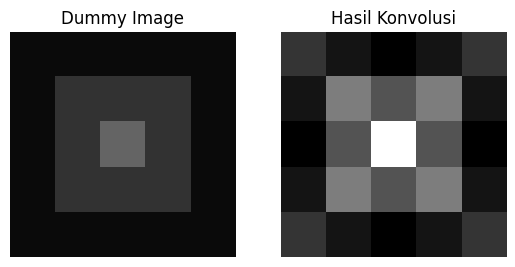

Image:
 [[ 10.  10.  10.  10.  10.]
 [ 10.  50.  50.  50.  10.]
 [ 10.  50. 100.  50.  10.]
 [ 10.  50.  50.  50.  10.]
 [ 10.  10.  10.  10.  10.]]
Hasil Konvolusi:
 [[ 10. -50. -90. -50.  10.]
 [-50. 150.  70. 150. -50.]
 [-90.  70. 400.  70. -90.]
 [-50. 150.  70. 150. -50.]
 [ 10. -50. -90. -50.  10.]]


In [9]:
#C

def convolution2d(image, kernel, stride=1, padding=0):
    k_h, k_w = kernel.shape
    kernel = np.flipud(np.fliplr(kernel))
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image.copy()

    i_h, i_w = image_padded.shape
    out_h = (i_h - k_h) // stride + 1
    out_w = (i_w - k_w) // stride + 1
    output = np.zeros((out_h, out_w))

    for y in range(0, out_h):
        for x in range(0, out_w):
            region = image_padded[y*stride:y*stride+k_h, x*stride:x*stride+k_w]
            output[y, x] = np.sum(region * kernel)

    return output

image = np.array([[10, 10, 10, 10, 10],
                  [10, 50, 50, 50, 10],
                  [10, 50,100, 50, 10],
                  [10, 50, 50, 50, 10],
                  [10, 10, 10, 10, 10]], dtype=np.float32)

kernel = np.array([[ -1, -1, -1],
                   [ -1,  8, -1],
                   [ -1, -1, -1]])

result = convolution2d(image, kernel, stride=1, padding=1)

plt.subplot(1,2,1)
plt.title("Dummy Image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Hasil Konvolusi")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.show()

print("Image:\n", image)
print("Hasil Konvolusi:\n", result)


Ukuran citra: (512, 512)


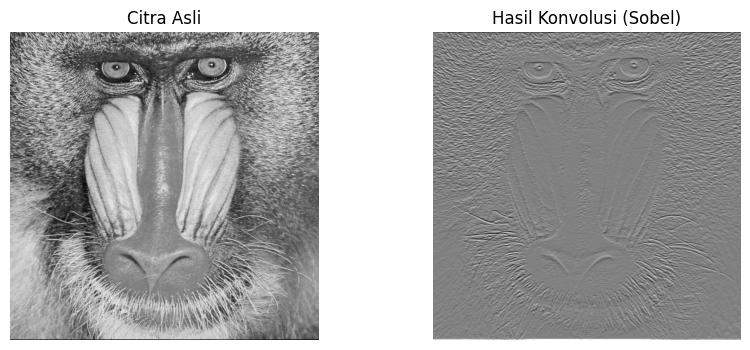

In [8]:
#D

def convolution2d(image, kernel, stride=1, padding=0):
    k_h, k_w = kernel.shape
    kernel = np.flipud(np.fliplr(kernel))
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image.copy()

    i_h, i_w = image_padded.shape
    out_h = (i_h - k_h) // stride + 1
    out_w = (i_w - k_w) // stride + 1
    output = np.zeros((out_h, out_w))

    for y in range(0, out_h):
        for x in range(0, out_w):
            region = image_padded[y*stride:y*stride+k_h, x*stride:x*stride+k_w]
            output[y, x] = np.sum(region * kernel)

    return output

img = cv.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/mandrill.tiff", cv.IMREAD_GRAYSCALE)
print("Ukuran citra:", img.shape)

kernel = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])

result = convolution2d(img, kernel, stride=1, padding=1)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Citra Asli")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Hasil Konvolusi (Sobel)")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.show()


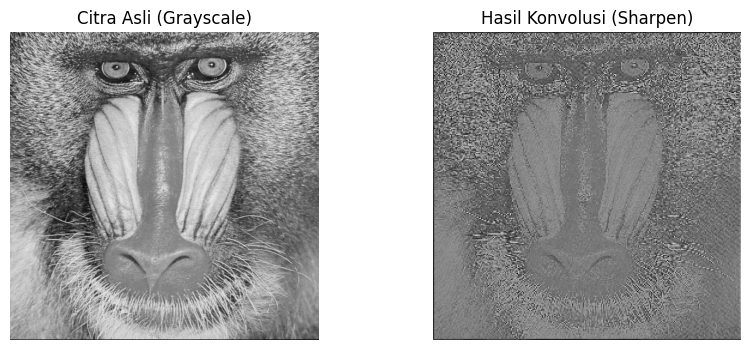

In [11]:
# E
def convolution2d(image, kernel, stride=1, padding=0):
    k_h, k_w = kernel.shape
    kernel = np.flipud(np.fliplr(kernel))
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image.copy()

    i_h, i_w = image_padded.shape
    out_h = (i_h - k_h) // stride + 1
    out_w = (i_w - k_w) // stride + 1
    output = np.zeros((out_h, out_w))

    for y in range(0, out_h):
        for x in range(0, out_w):
            region = image_padded[y*stride:y*stride+k_h, x*stride:x*stride+k_w]
            output[y, x] = np.sum(region * kernel)

    return output

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

img_gray = cv.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/mandrill.tiff", cv.IMREAD_GRAYSCALE)

result = convolution2d(img_gray, kernel_sharpen, stride=2, padding=2)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Citra Asli (Grayscale)")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Hasil Konvolusi (Sharpen)")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.show()


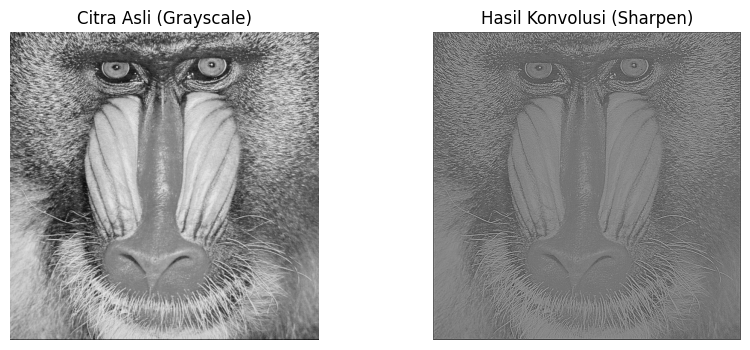

In [12]:
# F
def convolution2d(image, kernel, stride=1, padding=0):
    k_h, k_w = kernel.shape
    kernel = np.flipud(np.fliplr(kernel))
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image.copy()

    i_h, i_w = image_padded.shape
    out_h = (i_h - k_h) // stride + 1
    out_w = (i_w - k_w) // stride + 1
    output = np.zeros((out_h, out_w))

    for y in range(0, out_h):
        for x in range(0, out_w):
            region = image_padded[y*stride:y*stride+k_h, x*stride:x*stride+k_w]
            output[y, x] = np.sum(region * kernel)

    return output

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

img_gray = cv.imread("/content/drive/MyDrive/SEMESTER 5/PCVK/mandrill.tiff", cv.IMREAD_GRAYSCALE)

result = convolution2d(img_gray, kernel_sharpen, stride=1, padding=2)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Citra Asli (Grayscale)")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Hasil Konvolusi (Sharpen)")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.show()


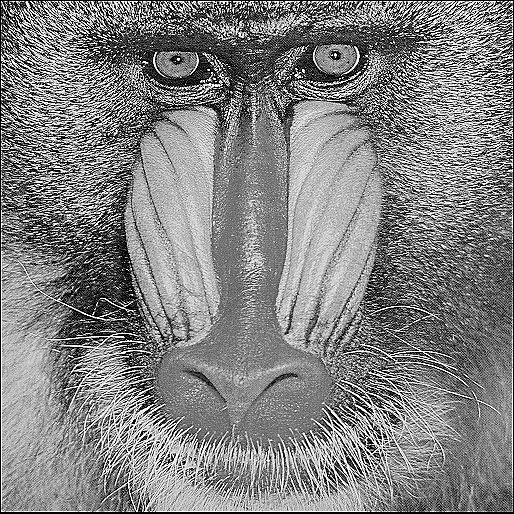

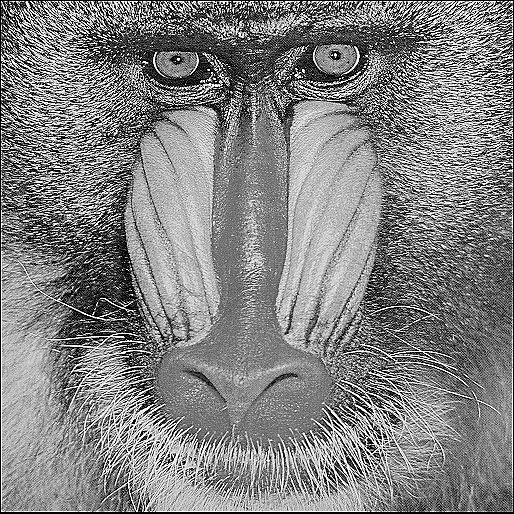

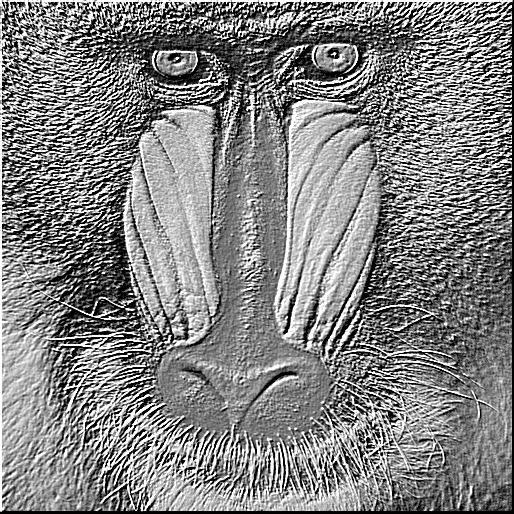

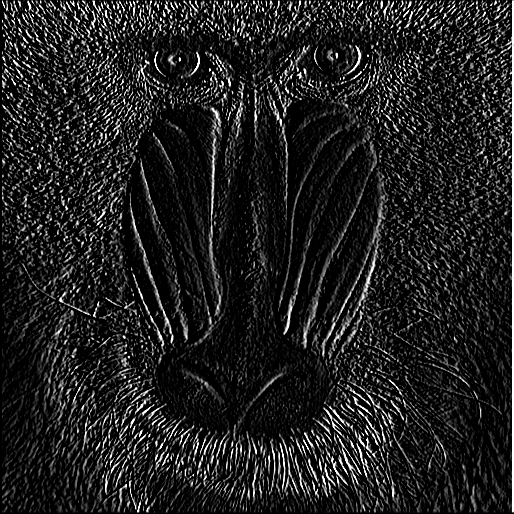

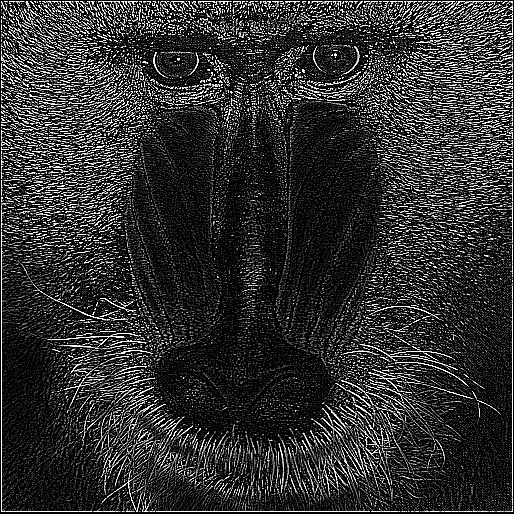

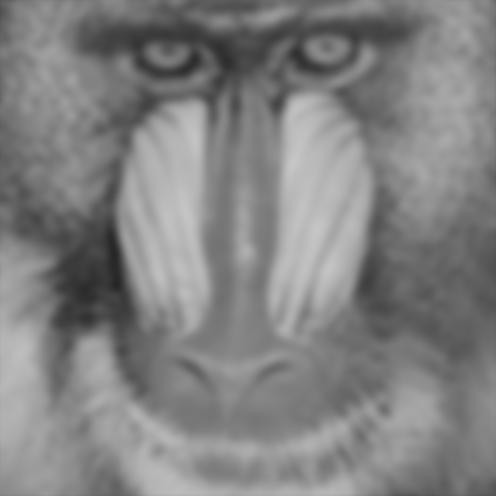

In [35]:
# 3
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape
  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1
  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution 2d
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#image sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))



# Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))

# Emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution2d(img_gray,kernel_emboss,1,2))


# Left Sobel Edge Detection
kernel_leftsobel = np.array([[1,0,-1],
                             [2,0,-2],
                             [1,0,-1]])

cv2_imshow(convolution2d(img_gray,kernel_leftsobel,1,2))

# Canny Edge Detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray,kernel_canny,1,2))


# 21x21 Gaussian Blur

kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size,sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))